Importa as bibliotecas necessárias:

In [1]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

Carrega o dataset:

In [2]:
data = pd.read_csv('./marketing.csv')
print(data)

        renda  n_criancas  n_adolescentes  retorno  consumo_vinho  \
0     84835.0           0               0        0            189   
1     57091.0           0               0        0            464   
2     67267.0           0               1        0            134   
3     32474.0           1               1        0             10   
4     21474.0           1               0        0              6   
...       ...         ...             ...      ...            ...   
2211  66476.0           0               1       99            372   
2212  31056.0           1               0       99              5   
2213  46310.0           1               0       99            185   
2214  65819.0           0               0       99            267   
2215  94871.0           0               2       99            169   

      consumo_frutas  consumo_carne  consumo_peixe  consumo_doces  \
0                104            379            111            189   
1                  5             

"_DecisionTreeClassifier_ é uma classe capaz de performar classificação multi-classe em um dataset."

Organiza os valores para as __várias__ classes na entrada:

In [3]:
X = data.drop('resposta', axis=1)
print(X)

        renda  n_criancas  n_adolescentes  retorno  consumo_vinho  \
0     84835.0           0               0        0            189   
1     57091.0           0               0        0            464   
2     67267.0           0               1        0            134   
3     32474.0           1               1        0             10   
4     21474.0           1               0        0              6   
...       ...         ...             ...      ...            ...   
2211  66476.0           0               1       99            372   
2212  31056.0           1               0       99              5   
2213  46310.0           1               0       99            185   
2214  65819.0           0               0       99            267   
2215  94871.0           0               2       99            169   

      consumo_frutas  consumo_carne  consumo_peixe  consumo_doces  \
0                104            379            111            189   
1                  5             

"Árvores de decisão são um método de aprendizado de máquina __supervisionado__ e não-parametrizado usado para classificação e regressão."

Organiza as __saídas esperadas__ (uma vez que é supervisionado):

In [4]:
Y = data['resposta']
print(Y)

0       1
1       1
2       0
3       0
4       1
       ..
2211    0
2212    0
2213    0
2214    0
2215    1
Name: resposta, Length: 2216, dtype: int64


"O objetivo é criar um modelo que prevê o valor de uma variável alvo aprendendo regras de decisão simples inferidas pelas características da informação."

Inicia e __treina__ o modelo:

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

É a árvore de decisão:

In [ ]:
plt.figure(figsize=(40, 20), dpi=600)
tree.plot_tree(clf, filled=True)
plt.savefig('decision_tree_high_res.png', format='png')
plt.show()

__Prevê um valor__, isto é, um resultado para certos valores das classes na entrada:

In [6]:
cliente = {
    'renda': 62541.5,
    'n_criancas': 1,
    'n_adolescentes': 1,
    'retorno': 2,
    'consumo_vinho': 254,
    'consumo_frutas': 55,
    'consumo_carne': 165,
    'consumo_peixe': 74,
    'consumo_doces': 42,
    'consumo_ouro': 148,
    'n_desconto': 3,
    'n_compras_site': 6,
    'n_compras_catalogo': 5,
    'n_compras_loja': 4,
    'n_vistas_site': 8,
    'reclamacao': 0
}

df = pd.DataFrame([cliente.values()], columns = cliente.keys())

predicao = clf.predict(df)

print(predicao)

[1]


Entretanto, se for um cliente com alta renda mas que __consumiu pouco__:

In [7]:
cliente = {
    'renda': 92812.0,
    'n_criancas': 3,
    'n_adolescentes': 1,
    'retorno': 2,
    'consumo_vinho': 25,
    'consumo_frutas': 5,
    'consumo_carne': 32,
    'consumo_peixe': 12,
    'consumo_doces': 7,
    'consumo_ouro': 8,
    'n_desconto': 5,
    'n_compras_site': 2,
    'n_compras_catalogo': 1,
    'n_compras_loja': 1,
    'n_vistas_site': 5,
    'reclamacao': 8
}

df = pd.DataFrame([cliente.values()], columns = cliente.keys())

predicao = clf.predict(df)

print(predicao)

[1]


Gerando o relatório de métricas:

In [8]:

# divide o conjunto de dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# refaz o treinamento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

predicao = clf.predict(X_test)

report = classification_report(Y_test, predicao)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       567
           1       0.40      0.53      0.46        98

    accuracy                           0.82       665
   macro avg       0.66      0.70      0.67       665
weighted avg       0.84      0.82      0.83       665



"Por definição, a matriz de confusão C é aquela onde $C_{i, j}$ é igual ao número de observações conhecidas no grupo $i$ mas que foram previstas no grupo $j$."

Gerando a matriz de confusão:

[[490  77]
 [ 46  52]]


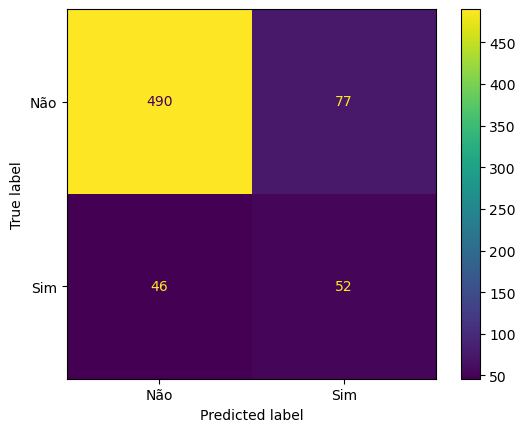

In [9]:
matrix = confusion_matrix(Y_test, predicao)

print(matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=['Não', 'Sim'])
disp.plot()

plt.show()

Apresenta uma regra extraída da árvore:

In [14]:
rules = export_text(clf, feature_names=list(cliente.keys()))

print(rules)

|--- consumo_vinho <= 881.50
|   |--- retorno <= 19.50
|   |   |--- n_compras_catalogo <= 0.50
|   |   |   |--- n_vistas_site <= 7.50
|   |   |   |   |--- consumo_doces <= 15.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- consumo_doces >  15.00
|   |   |   |   |   |--- retorno <= 11.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- retorno >  11.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- n_vistas_site >  7.50
|   |   |   |   |--- consumo_vinho <= 3.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- consumo_vinho >  3.00
|   |   |   |   |   |--- consumo_carne <= 15.50
|   |   |   |   |   |   |--- n_vistas_site <= 8.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- n_vistas_site >  8.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- consumo_carne >  15.50
|   |   |   |   |   |   |--- consumo_ouro <= 11.00
|   |   |   |   |   |   |   |--- consumo_frutas <= 1.00
|   |   |   |   |   |   |   |   |---